In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.set_option("display.max_columns",None)

## 1) Problem Statement

- Forcasting insurance policy that will lapse

## 2) Data Gathering

In [2]:
df = pd.read_csv("D:\Samar\Project for resume\project_1\dataset.csv")
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


## 3) EDA / DQ Check

>> INSIGHTS
- Shape:-
- Rows count - 79853
- columns count - 13
-----------------------------------------------------------------------------------------
- Informaton:-
- int column - 6
- float column - 5
- object column - 2
- There is 11 - munerical column & 2 - categorical column
-----------------------------------------------------------------------------------------
- Unique value of categorical columns & Value counts:-
- a) sourcing_channel
        A    43134
        B    16512
        C    12039
        D     7559
        E      609
- In sourcing_channel column we do replace 
- b) residence_area_type:-
        Urban    48183
        Rural    31670
- In resicance_area_type column we do OneHotEncoding
-------------------------------------------------------------------------------------------        
- Finding missing value:-
- a) Count_3-6_months_late - count of missing value(97) - percentage(0.121473)
- b) Count_6-12_months_late - count of  missing value(97) - percentage(0.121473)
- c) Count_more_than_12_months_late - count of missing value(97) - percentage(0.121473)
- d) application_underwriting_score  - count of missing value(2974) - percentage(3.724343)
- ########################################################################################
- There are 73 rows having NaN value above these 4 columns simultaneously
------------------------------------------------------------------------------------------
- Outliers Present in columns:-
- a) age_in_days
- b) premium
-------------------------------------------------------------------------------------------
- How many numerical colum present in df >  11 columns
- Numeric columns are > ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days','Income','Count_36_months_late','Count_612_months_late',
'Count_more_than_12_months_late', 'application_underwriting_score',
'no_of_premiums_paid', 'premium', 'target']

-------------------------------------------------------------------------------------------
- How many categorical columns present in df >> 2 columns
- Categorical columns are > ['sourcing_channel', 'residence_area_type']

## ----------------------------------------------------------------------------------------------------------------------

- Shape:-
- Rows count - 79853
- columns count - 13

In [3]:
df.shape

(79853, 13)

- Finding missing value:-
- a) Count_3-6_months_late - count of missing value(97) - percentage(0.121473)
- b) Count_6-12_months_late - count of missing value(97) - percentage(0.121473)
- c) Count_more_than_12_months_late - count of missing value(97) - percentage(0.121473)
- d) application_underwriting_score - count of missing value(2974) - percentage(3.724343)
- ########################################################################################
- There are 73 rows having NaN value above these 4 columns simultaneously 

In [4]:
df.isna().mean()*100

id                                  0.000000
perc_premium_paid_by_cash_credit    0.000000
age_in_days                         0.000000
Income                              0.000000
Count_3-6_months_late               0.121473
Count_6-12_months_late              0.121473
Count_more_than_12_months_late      0.121473
application_underwriting_score      3.724343
no_of_premiums_paid                 0.000000
sourcing_channel                    0.000000
residence_area_type                 0.000000
premium                             0.000000
target                              0.000000
dtype: float64

In [5]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [6]:
df[(df["Count_3-6_months_late"].isnull()) & (df["Count_6-12_months_late"].isnull()) &
   (df["Count_more_than_12_months_late"].isnull()) & 
   (df["application_underwriting_score"].isnull())]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
158,73099,1.0,15336,210100,NaN,NaN,NaN,NaN,2,A,Urban,9600,0
1216,81690,1.0,7679,39040,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
1471,49862,1.0,10593,49520,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
3092,59,1.0,17891,90100,NaN,NaN,NaN,NaN,2,A,Urban,5700,1
4177,19184,1.0,18260,40530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73098,109871,1.0,9866,81120,NaN,NaN,NaN,NaN,2,A,Urban,1200,0
73623,50356,1.0,16431,108030,NaN,NaN,NaN,NaN,2,A,Urban,7500,0
73733,90421,1.0,10232,42150,NaN,NaN,NaN,NaN,2,A,Rural,1200,1
75360,66964,1.0,21545,65530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0


- Informaton:-
- int column - 6
- float column - 5
- object column - 2
- There is 11 - munerical column & 2 - categorical column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  targ

In [8]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [9]:
df.corr(numeric_only=True).tail(1)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
target,-0.005064,-0.24098,0.095103,0.016541,-0.2489,-0.286159,-0.240385,0.068715,0.022664,0.036416,1.0


<AxesSubplot:>

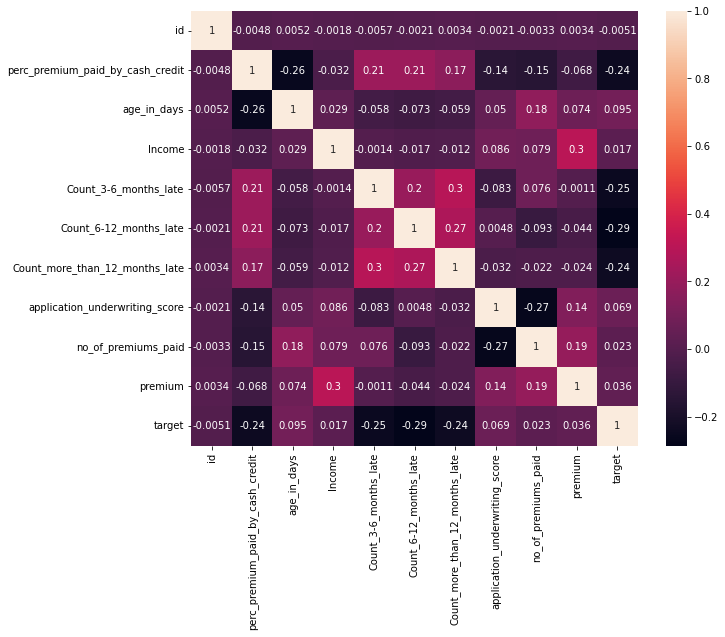

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [11]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


- Outliers Present in columns:-
- a) age_in_days
- b) premium

<AxesSubplot:>

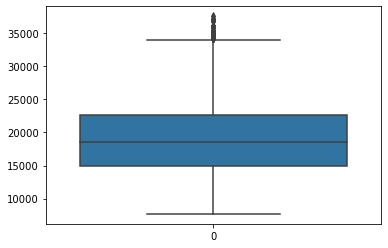

In [12]:
sns.boxplot(df["age_in_days"])

<AxesSubplot:>

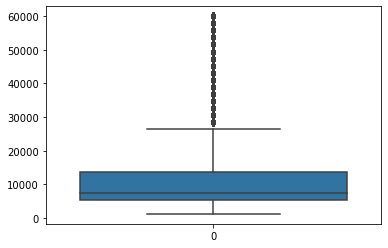

In [13]:
sns.boxplot(df["premium"])

- How many numerical colum present in df > 11 columns
- Numeric columns are > ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days','Income','Count_36_months_late','Count_612_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'target']

In [14]:
df._get_numeric_data()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,9600,1
...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,13800,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,28500,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,9600,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,5700,1


In [15]:
df._get_numeric_data().columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'premium', 'target'],
      dtype='object')

- How many categorical columns present in df >> 2 columns
- Categorical columns are > ['sourcing_channel', 'residence_area_type']

In [16]:
df.select_dtypes(include="object")

,sourcing_channel,residence_area_type
0,C,Urban
1,A,Urban
2,C,Rural
3,A,Urban
4,B,Urban
...,...,...
79848,B,Urban
79849,A,Rural
79850,A,Rural
79851,A,Rural


In [17]:
df.select_dtypes(include="object").columns

Index(['sourcing_channel', 'residence_area_type'], dtype='object')

- Value counts of numerical data

In [18]:
lst= df._get_numeric_data().columns
for i in lst:
    print(df[i].value_counts())
    print("*"*50)

id
110936    1
105234    1
64751     1
71729     1
113932    1
         ..
84421     1
30336     1
85738     1
3510      1
71531     1
Name: count, Length: 79853, dtype: int64
**************************************************
perc_premium_paid_by_cash_credit
0.000    5723
1.000    5004
0.001     698
0.002     612
0.003     551
         ... 
0.640      19
0.869      17
0.759      17
0.851      16
0.742      15
Name: count, Length: 1001, dtype: int64
**************************************************
age_in_days
17899    226
16802    223
17895    219
17163    217
16801    216
        ... 
34317      1
36870      1
34320      1
7690       1
34318      1
Name: count, Length: 833, dtype: int64
**************************************************
Income
150130    171
150060    162
150090    158
150120    157
150050    154
         ... 
173940      1
28920       1
261800      1
152940      1
39330       1
Name: count, Length: 24165, dtype: int64
************************************************

 - Value counts of categorical data

In [19]:
lst1 = ['sourcing_channel', 'residence_area_type']
for col in lst1:
    print(df[col].value_counts())
    print("*"*50)

sourcing_channel
A    43134
B    16512
C    12039
D     7559
E      609
Name: count, dtype: int64
**************************************************
residence_area_type
Urban    48183
Rural    31670
Name: count, dtype: int64
**************************************************


## Graphical representaion

### Age wise Count of Target-0

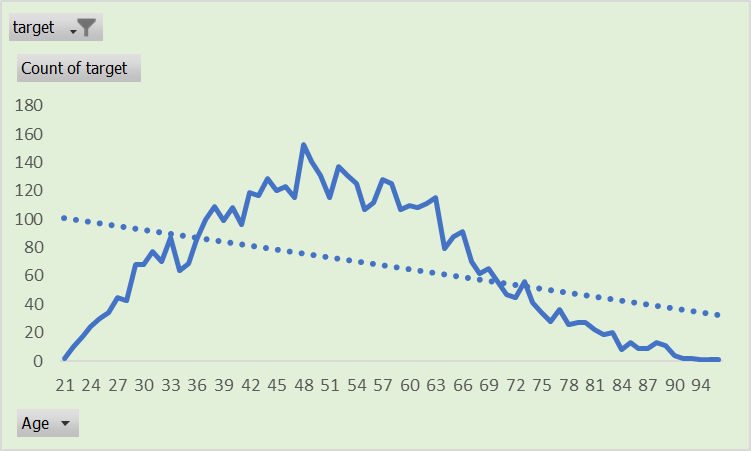

### Age wise Count of Target-1

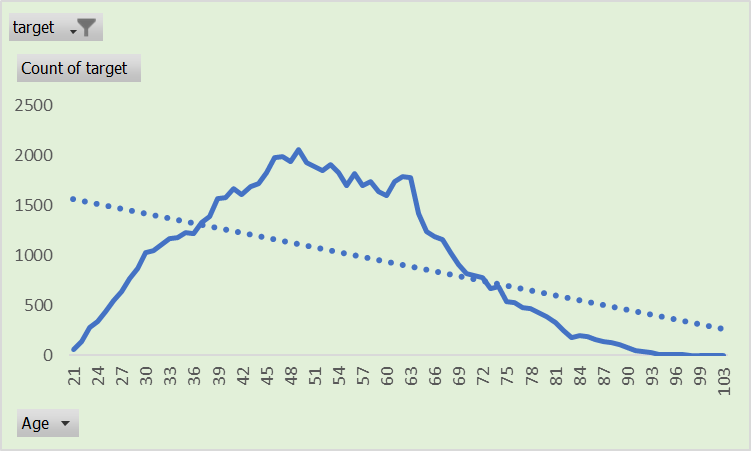

### Sourcing_channel wise count of target

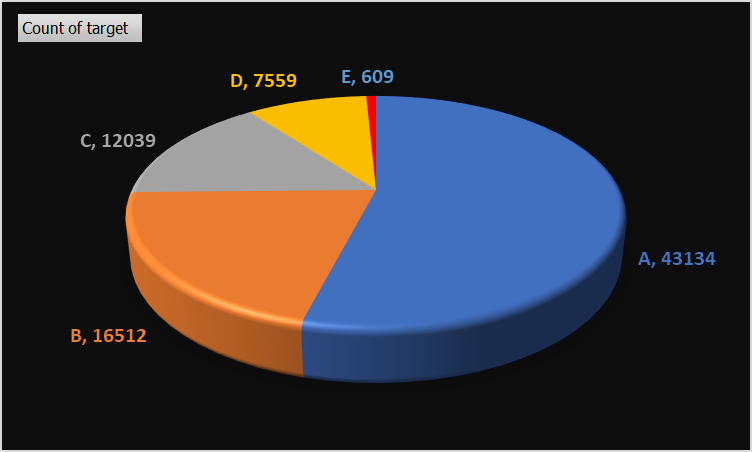

### sourcing_channel wise maximun number of premium paid

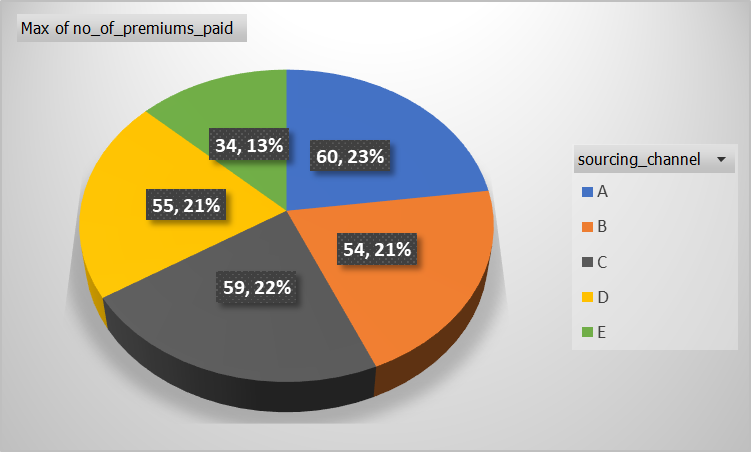

### sourcing_channel wise maximun number of premium paid

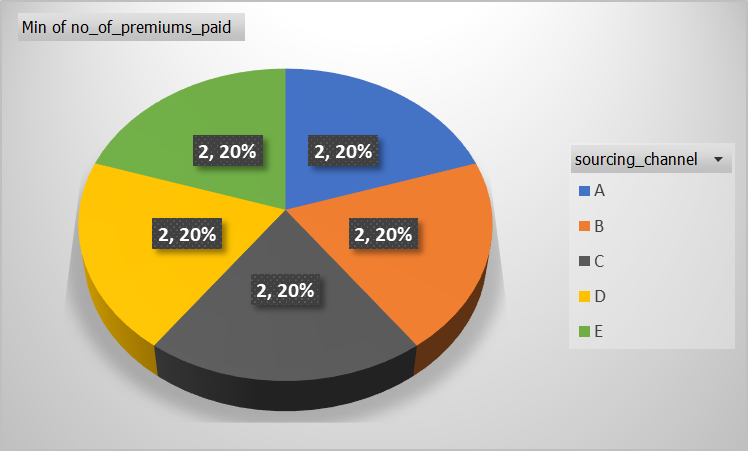

- Target - 0 >> Maximum count of 3-6 month late > 13
- Target - 1 >> Maximum count of 3-6 month late > 9

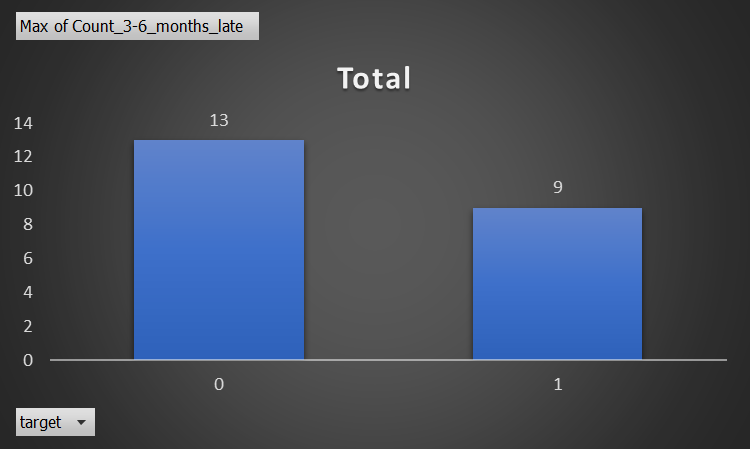

- Target - 0 >> Maximum count of 6-12 month late > 17
- Target - 1 >> Maximum count of 6-12 month late > 15

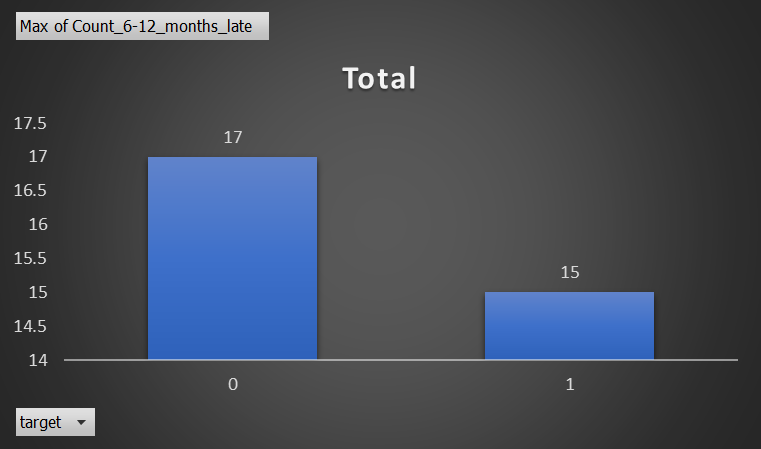

- Target - 0 >> Maximum count of more then 12 month late > 11
- Target - 1 >> Maximum count of more then 12 month late > 8

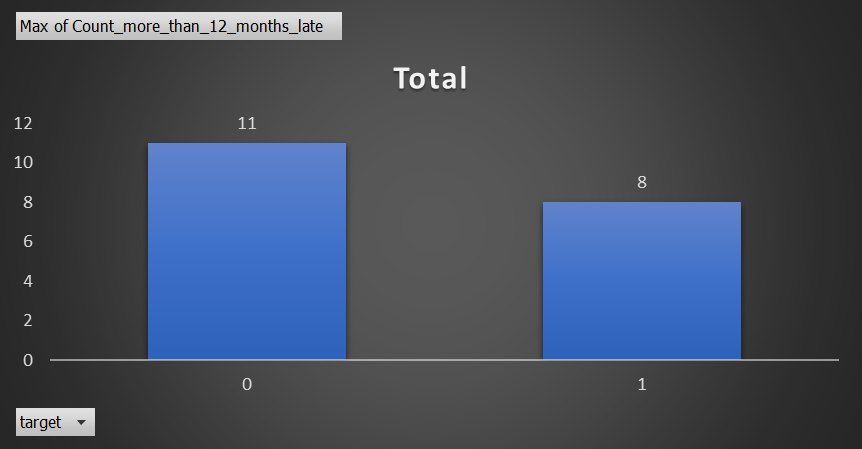

Percentage Of target-0 & target-1

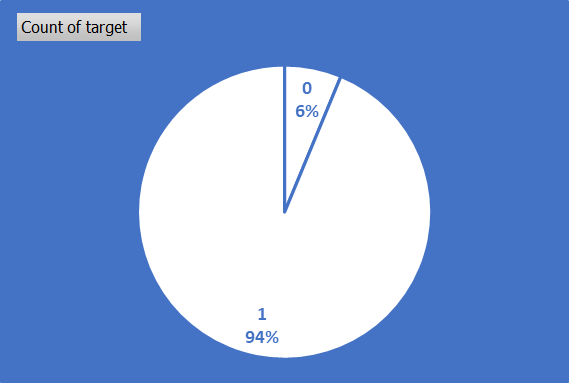

## Maximum Premimum as compare to age

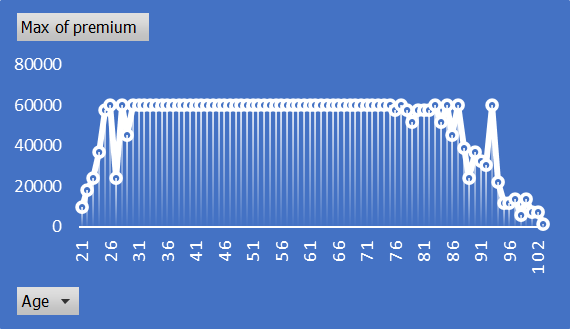

## Minimum Premimum as compare to age

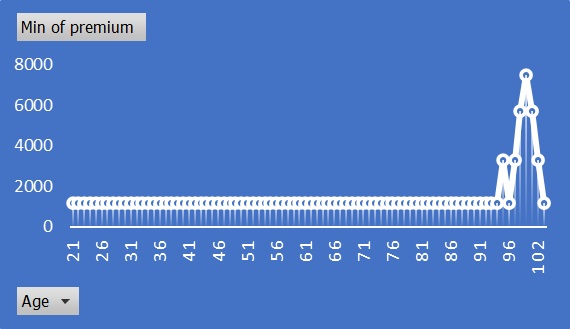

## Age wise count

Here we can see age- 40 to 60 Population is more

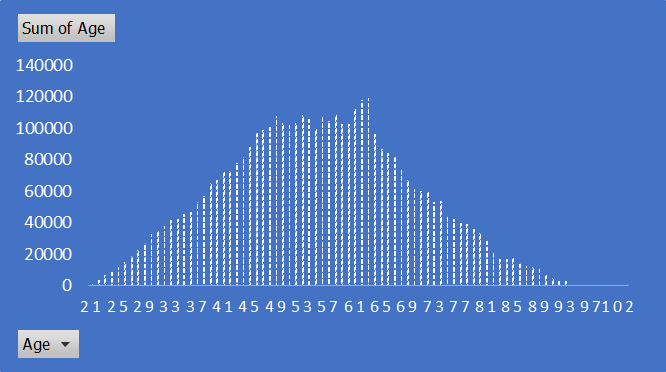

In [20]:
df.head(2)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1


In [21]:
pd.crosstab(df["age_in_days"],df["sourcing_channel"])

sourcing_channel,A,B,C,D,E
age_in_days,,,,,
7670,3,0,0,0,0
7671,3,0,0,0,0
7672,7,0,0,0,0
7673,3,0,0,0,0
7674,5,1,0,0,0
...,...,...,...,...,...
36870,1,0,0,0,0
36874,1,0,0,0,0
37239,0,1,0,0,0


In [22]:
df.groupby("age_in_days").first()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
age_in_days,,,,,,,,,,,,
7670,54704,0.951,93110,0.0,0.0,0.0,99.88,3,A,Rural,3300,1
7671,48559,0.778,30110,0.0,0.0,0.0,99.87,3,A,Rural,1200,0
7672,112153,0.843,27010,2.0,2.0,1.0,99.89,9,A,Rural,1200,1
7673,98820,1.000,36120,0.0,0.0,0.0,NaN,2,A,Urban,5700,1
7674,14037,0.607,55640,0.0,0.0,0.0,99.89,4,B,Urban,5700,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36870,48348,0.026,50050,0.0,0.0,0.0,99.87,7,A,Rural,5700,1
36874,44175,0.003,86570,2.0,0.0,0.0,NaN,8,A,Rural,7500,0
37239,67942,0.110,102580,0.0,0.0,0.0,99.27,9,B,Urban,7500,1


In [23]:
df.groupby("no_of_premiums_paid").agg(Target_1=("target","max"),
                                      Target_0=("target","min") )

,Target_1,Target_0
no_of_premiums_paid,,
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0
10,1,0


In [24]:
df.groupby("age_in_days").agg(Target_1=("target","max"),
                              Target_0=("target","min") )

,Target_1,Target_0
age_in_days,,
7670,1,1
7671,1,0
7672,1,0
7673,1,1
7674,1,1
...,...,...
36870,1,1
36874,0,0
37239,1,1


In [25]:
df2 = df.groupby("age_in_days").agg(Premium_max=("perc_premium_paid_by_cash_credit","max"),
                              Premium_min=("perc_premium_paid_by_cash_credit","min") )
df2.head()
# df2.to_csv("gr1.csv")

,Premium_max,Premium_min
age_in_days,,
7670,0.951,0.289
7671,0.778,0.391
7672,1.000,0.000
7673,1.000,1.000
7674,1.000,0.000


Count_3-6_month_late :- 84% of the customer not late in 3to6 Month

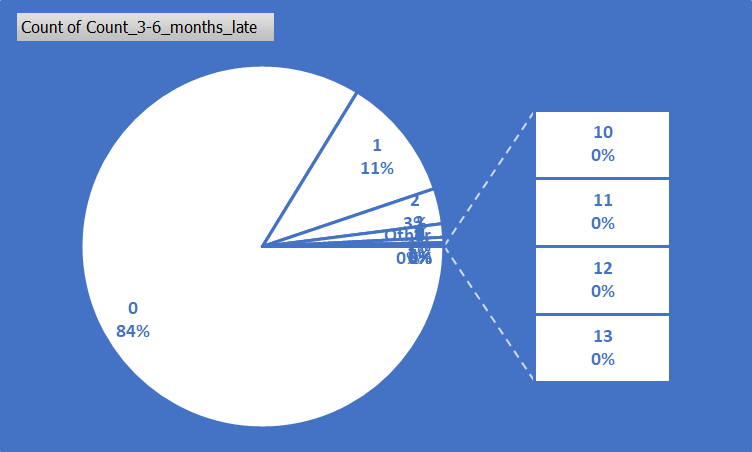

Count_6-12_month_late :- 95% of the customer not late in 6to12 Month

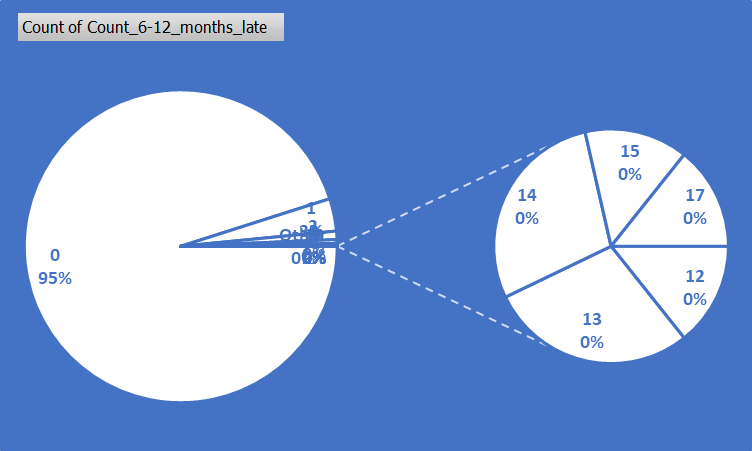

Count_more_than_month_late :- 95% of the customer not late in more than 12 month

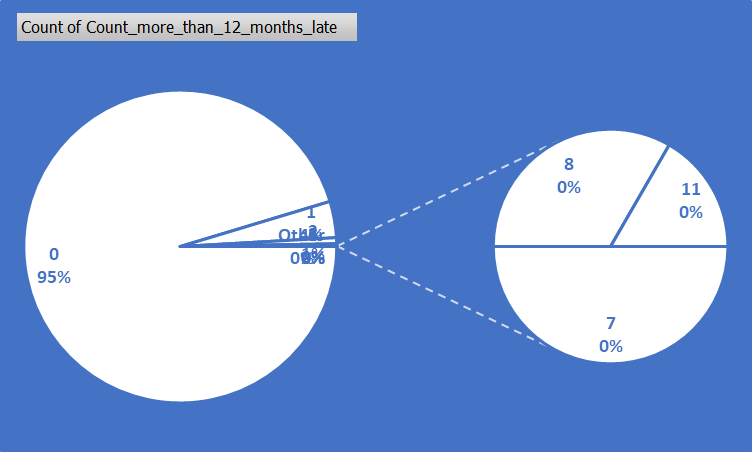

Age vs Average Income

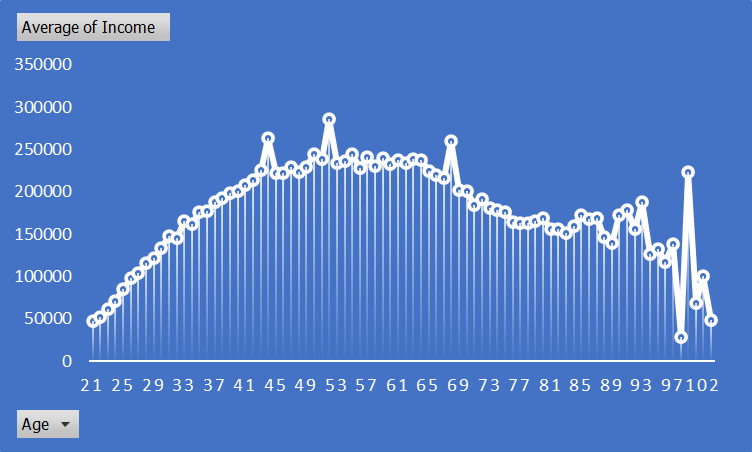

Age vs Averagepremium

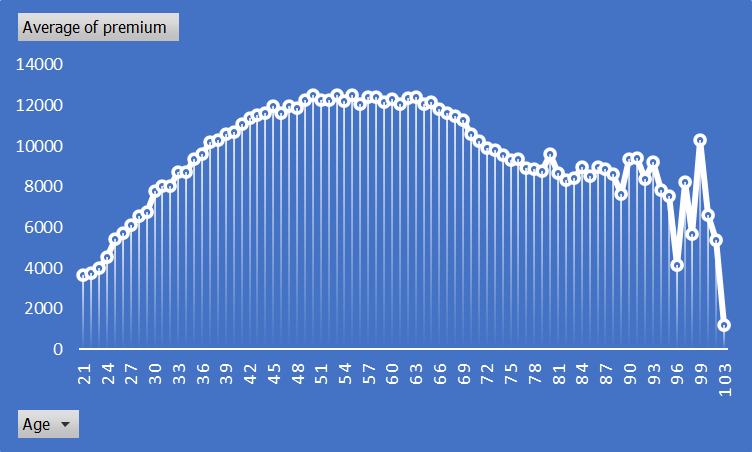

Age vs Sum of Premium Paid

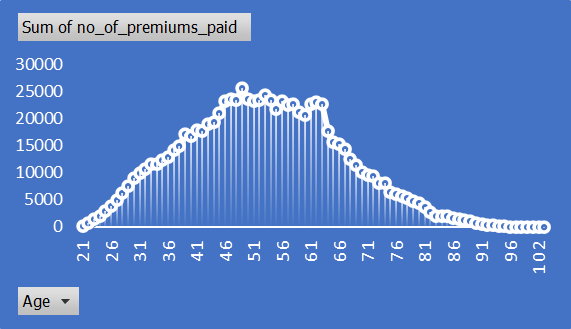

## 4) Feature Engineering

#### 4.1 Handling missing value

In [28]:
df["application_underwriting_score"].fillna(df["application_underwriting_score"].mean(),inplace=True)
df["Count_3-6_months_late"].fillna(df["Count_3-6_months_late"].min(),inplace=True)
df["Count_6-12_months_late"].fillna(df["Count_6-12_months_late"].min(),inplace=True)
df["Count_more_than_12_months_late"].fillna(df["Count_more_than_12_months_late"].min(),inplace=True)

In [53]:
df.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
target                              0
Age                                 0
Age_bucket                          0
Income_bucket                       0
Premium_bucket                      0
dtype: int64

#### 4.2 id

In [30]:
df.drop("id",axis=1,inplace=True)

### 4.3 Encoding

##### 4.3.1 sourcing_channel

- After replace 
"A" = 0
"B" = 1
"C" = 2
"D" = 3
"E" = 4

In [31]:
df["sourcing_channel"].value_counts()

sourcing_channel
A    43134
B    16512
C    12039
D     7559
E      609
Name: count, dtype: int64

In [32]:
df["sourcing_channel"].replace({"A":0,"B":1,"C":2,"D":3,"E":4},inplace=True)

In [33]:
df["sourcing_channel"].value_counts()

sourcing_channel
0    43134
1    16512
2    12039
3     7559
4      609
Name: count, dtype: int64

##### 4.3.2 residence_area_type

- After replacing
"Urban" = 0 and "Rural" = 1

In [34]:
df["residence_area_type"].value_counts()

residence_area_type
Urban    48183
Rural    31670
Name: count, dtype: int64

In [35]:
df["residence_area_type"].replace({"Urban":0,"Rural":1},inplace=True)

In [36]:
df["residence_area_type"].value_counts()

residence_area_type
0    48183
1    31670
Name: count, dtype: int64

### 4.4 Feature Creation

##### age_in_days

In [37]:
df["Age"] = df["age_in_days"]//365

In [38]:
buckets = [18,30,45,60,np.inf]
labels  = [0,1,2,3]
df["Age_bucket"] = pd.cut(df["Age"],bins=buckets,labels=labels,include_lowest=True,right = False)
df["Age_bucket"].value_counts()

Age_bucket
2    29713
3    23807
1    21972
0     4361
Name: count, dtype: int64

In [39]:
df[["Age_bucket","Age"]]

,Age_bucket,Age
0,1,33
1,2,59
2,2,48
3,1,42
4,3,86
...,...,...
79848,3,64
79849,2,53
79850,3,64
79851,3,62


##### Income

In [43]:
buckets = [20000,50000,150000,300000,500000,np.inf]
labels  = [0,1,2,3,4]
df["Income_bucket"] = pd.cut(df["Income"],bins=buckets,labels=labels,include_lowest=True,right = False)
df["Income_bucket"].value_counts()

Income_bucket
2    32536
1    30101
3    11010
0     3391
4     2815
Name: count, dtype: int64

In [54]:
df[["Income_bucket","Income"]].head()

,Income_bucket,Income
0,3,355060
1,3,315150
2,1,84140
3,2,250510
4,2,198680


In [45]:
df.head(3)

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,Age,Age_bucket,Income_bucket
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,0,3300,1,33,1,3
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,0,18000,1,59,2,3
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,1,3300,0,48,2,1


##### Premium

In [47]:
df["premium"].max()

60000

In [48]:
df["premium"].min()

1200

In [49]:
buckets = [1000,10000,20000,30000,40000,np.inf]
labels  = [0,1,2,3,4]
df["Premium_bucket"] = pd.cut(df["premium"],bins=buckets,labels=labels,include_lowest=True,right = False)
df["Premium_bucket"].value_counts()

Premium_bucket
0    49373
1    19273
2     7485
3     2172
4     1550
Name: count, dtype: int64

In [56]:
df[["Premium_bucket","premium"]].head()

,Premium_bucket,premium
0,0,3300
1,1,18000
2,0,3300
3,0,9600
4,0,9600


In [57]:
df.head(3)

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,Age,Age_bucket,Income_bucket,Premium_bucket
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,0,3300,1,33,1,3,0
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,0,18000,1,59,2,3,1
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,1,3300,0,48,2,1,0
